In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [3]:
dataset = pd.read_csv("loan.csv")
dataset.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [4]:
dataset.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,614.000000,614.000000,592.000000,600.00000,564.000000
mean,5403.459283,1621.245798,146.412162,342.00000,0.842199
std,6109.041673,2926.248369,85.587325,65.12041,0.364878
min,150.000000,0.000000,9.000000,12.00000,0.000000
25%,2877.500000,0.000000,100.000000,360.00000,1.000000
50%,3812.500000,1188.500000,128.000000,360.00000,1.000000
75%,5795.000000,2297.250000,168.000000,360.00000,1.000000
max,81000.000000,41667.000000,700.000000,480.00000,1.000000


In [5]:
# lets compress CoapplicantIncome

In [6]:
from sklearn.preprocessing import MinMaxScaler

In [7]:
mmSc = MinMaxScaler()

In [8]:
mmSc.fit(dataset[["CoapplicantIncome"]])

MinMaxScaler()

In [10]:
ar = mmSc.transform(dataset[["CoapplicantIncome"]])
ar

array([[0.00000000e+00],
       [3.61917105e-02],
       [0.00000000e+00],
       [5.65915473e-02],
       [0.00000000e+00],
       [1.00703194e-01],
       [3.63837089e-02],
       [6.00955192e-02],
       [3.66237070e-02],
       [2.63229894e-01],
       [1.67998656e-02],
       [4.41596467e-02],
       [1.94542444e-01],
       [6.81594547e-02],
       [2.60637915e-02],
       [0.00000000e+00],
       [0.00000000e+00],
       [0.00000000e+00],
       [0.00000000e+00],
       [8.39993280e-02],
       [0.00000000e+00],
       [1.34998920e-01],
       [4.58636331e-02],
       [4.60076319e-02],
       [7.01994384e-02],
       [0.00000000e+00],
       [5.40715674e-02],
       [2.49598003e-02],
       [0.00000000e+00],
       [4.99916001e-02],
       [8.08553532e-02],
       [0.00000000e+00],
       [0.00000000e+00],
       [4.00076799e-02],
       [7.19994240e-02],
       [4.96076031e-02],
       [3.19197446e-02],
       [3.50157199e-02],
       [1.73038616e-01],
       [4.00316797e-02],


In [11]:
dataset["coapIn_scaled"] = pd.DataFrame(ar,columns=["coapIn_scaled"])
dataset.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status,coapIn_scaled
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y,0.000000
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N,0.036192
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y,0.000000
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y,0.056592
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y,0.000000


In [12]:
# hence we compressed the values in the range of 0 to 1

C:\Users\santo\AppData\Local\Temp\ipykernel_4216\3256140313.py:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(dataset["CoapplicantIncome"])
C:\Users\santo\AppData\Local\Temp\ipykernel_4216\3256140313.py:8: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(dataset["coapIn_scaled"])


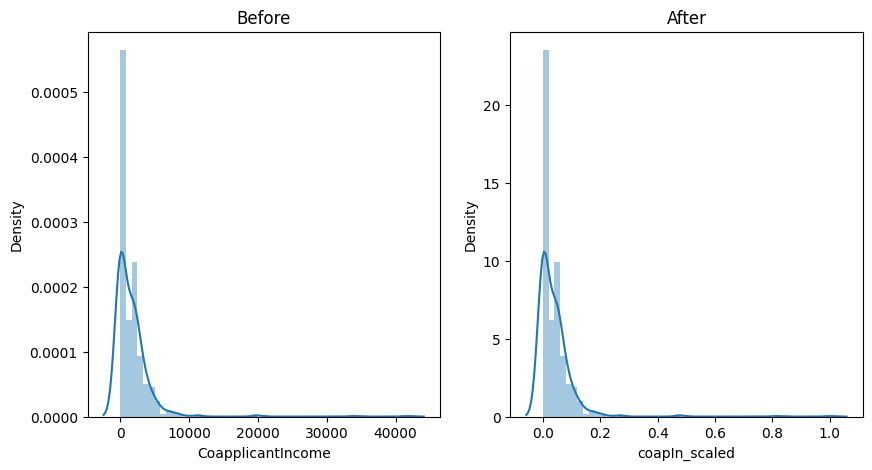

In [19]:
plt.figure(figsize=(10,5))
plt.subplot(1,2,1)
plt.title("Before")
sns.distplot(dataset["CoapplicantIncome"])

plt.subplot(1,2,2)
plt.title("After")
sns.distplot(dataset["coapIn_scaled"])
plt.show()

In [20]:
# normalizatin compressed the data in the range 0 to 1 without changing the nature of data